# <font color='maroon'>Comparing the population mean to a sample</font>

## Michael NANA KAMENI

Let's begin with an example. In women's college basketball, the average age of a player is 26 years of age. Suppose you are given a dataset containing information on some college basketball teams. Is this dataset generated from a the population with an average age of 26? In this lesson we'll look at how to formulate a hypothesis that answers this question, and learn how to test such a hypothesis.

## Formulating an hypothesis

We often state a hypothesis about the world and then use data to support the hypothesis. We can formulate a hypothesis about any statistic, be it the the mean, the correlation between variables, etc. Setting up and testing a hypothesis usually has the following steps.
1. We state a null hypothesis, $H_0$, which always assumes no change has occurred to the statistic. 
2. Specify the alternative hypothesis $H_1$, which assumes the statistic has changed.
3. Specify a significance level $\alpha$,which is a probability threshold that determines when you reject the null hypothesis. Put differently, significance level tells expresses the risk taken when you reject the null hypothesis. We set this before we start the test.  A significance level of 0.05 is often used, which is considered not too harsh. 
4. A test statistic is calculated that determines if the sample estimate differs significantly from the population;
5. And the null hypothesis is either rejected or accepted.

We use a one sample t-test to answers questions like the one above. The test helps us determine whether sample observations where generated with a specific mean $\mu$, or where these observations generated by chance. Statistically this is asking the following question: Is the sample mean $\overline{x}$ different from the population mean from which the sample was generated? We formulate a null hypothesis that says there is no difference between the sample mean and the population mean $\mu$.

$H_0: \mu = \overline{x}$, i.e., there is no difference between the mean values.

$H_1: \mu \neq \overline{x}$, i.e., there is a difference between the mean values. Note that this is a two-tailed or two-sided hypothesis test. If we were considering whether the sample mean was greater or smaller than the true mean, we would call this a one-tailed hypothesis test.

We will perform the test at a 5% signficance level, the cutt-off point were if the test statistic computed has a probability $P$ and 

$P > 0.05$, then we accept the null hypothesis; otherwise

$P < 0.05$, then we reject the null hypothesis.




<!--The desired confidence level, which is the probability that you guessed that the confidence interval correctly guesses the population parameter is written as $$1 - \alpha,$$ where $\alpha$ is a small number, usually $\alpha = 0.05$. So,

$P(|\overline{x} - \mu| > z*s.e.) = \alpha$

$P(|\overline{x} - \mu| \leq z*s.e.) = 1 - \alpha$-->




## One-Sample T-Test

We would like to compare the average age of a college basketball player with the population mean. We have a small data set and don't know the sample variance $\sigma^2$ or standard deviation $\sigma$. We can estimate the standard deviation from the data set and call it $s$. To determine if the average age differs from the population mean, we use one-sample t-test because it takes into account the sample size, and calculates the standard error estimate $s$. We are now sampling from a different distribution called a t-distribution.  The test also introduces a new concept that will be used for different t-tests. The idea of degrees of freedom. See this link for more on degrees of freedom. The degrees of freedom for computing the sample variance are $n-1$ where $n$ is the number of observations in the data set.

In [1]:
from numpy import random
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('WNBAstats.csv', sep=',')

In [4]:
df.columns.size

32

In [5]:
df.shape

(143, 32)

## A quick visualisation and check for normality

In order to perform a one-sample t-test, we need to check if our data is normally distributed. We do the check for normality in two ways. We first plot a histogram and see the distribution, then plot QQ or quantile-quantile normal plots. If the data is normally distributed, the QQ normal plots show that the data values lie almost on a straight line. We plot the QQ normal plots using the statsmodels.api library. A regression line helps us visualize this relationship clearly.

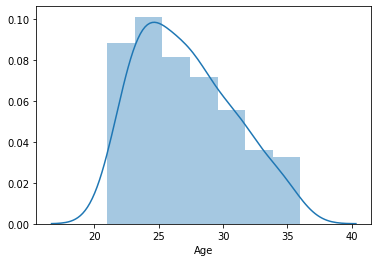

In [6]:
data = df['Age']
sns.distplot(data)

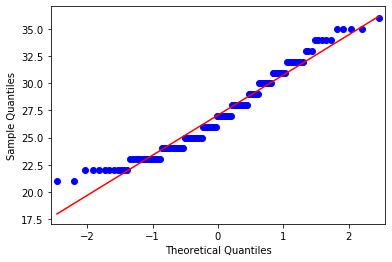

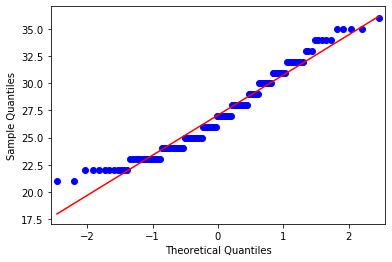

In [7]:
import statsmodels.api as sm
sm.qqplot(data, 
          line='r') # include regression line

The normal QQ plot displays the values observed in the data against the corresponding value from the standard normal curve. That is, the $i$-th ranked observation is plotted against the $\frac{i}{n+1}$-th quantile of the standard normal distribution. A linear relationship between the  of the data points indicates and the quantiles of the standard normal distributioin indicate approximately normally distrilbuted data.

See these links for more on [QQ plots](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) and [Normal Quantile-Quantile Plots](https://www.youtube.com/watch?v=X9_ISJ0YpGw).

## Formulating the hypothesis

According to <a href="http://boards.rebkell.net/viewtopic.php?p=1244967#1244967">RebKell's Junkie Boards</a>, the average age of a college basket ball player is 26. Does the average sample mean age differ from the true population mean $\mu$?

$H_0: \mu= 26$?

$H_1: \mu \neq 26$?

This is a two-sided hypothesis test. We consider both tails the distribution. The distribution is symmetric with, both tail area equal to 0.025. So when using `scipy.stats` to find the t-value, we use a probability $1 - 0.025 = 0.975$ to return a t-value of 1.96 for a 95% confidence interval. 

We will perform the test at a 5% signficance level, the cutt-off point were if the test statistic computed has a probability $P$ and 

$P > 0.05$, we accept the null hypothesis; otherwise, with

$P < 0.05$, we reject the null hypothesis.



## The t-test

We perform the one-sample t-test using the `scipy.stats.ttest_1samp()` function.

In [8]:
mu = 26

In [9]:
stats.ttest_1samp(a=data,    # our sample data
                 popmean=mu) # population mean

Ttest_1sampResult(statistic=3.5002801232546803, pvalue=0.0006213361037891205)

### Interpreting the results

*The p-value*

The probability is 0.0006 that we will see data like the sample data if the null hypothesis is true. But the $p$-value is less than $\alpha$, so we reject the null hypothesis. 

*The test statistic*

The test statistic tells us how much the sample mean deviates from the true mean centred at zero. If the test statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. 

Accordi

### Exercise

Suppose we change the hypothesis and say,

$H_0: \mu= 26$, and the alternative hypothesis says the average player's age is less than the true mean,

$H_1: \mu < 26$.

We are now looking at a one-tail t-test that says that the true value lies to the left of the sample mean. 

Hint: to convert a two-sided p-value to a one-sided p-value, use $\dfrac{p}{2}$ or $\dfrac{(1-p)}{2}$.



In [10]:
t, p = stats.ttest_1samp(a=data,    # our sample data
                 popmean=mu)
p/2.0

0.00031066805189456026

## Interpreting the results

Normal QQ plots showed that the age of college basketball players is approximately normally distributed for both sample and whole population. A 95% conficence interval was used for the mean difference. The evidence indicates that the mean of the true population less than the mean of the sample.

### References

The article <a href="http://www.statisticssolutions.com/manova-analysis-one-sample-t-test/">
One Sample T-Test</a> talks a lot more about one sample t-tests.